In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense,AveragePooling2D
from keras.models import Model
from keras import layers
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.utils import shuffle
from keras.metrics import CategoricalAccuracy,BinaryAccuracy,Recall,Precision
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
import os
tb_dir='/content/drive/MyDrive/tbx11k-simplified/Dataset/TB'
len(os.listdir(tb_dir))

799

In [4]:
import os
dataset_url = '/content/drive/MyDrive/tbx11k-simplified'
os.chdir('/content/drive/MyDrive/tbx11k-simplified')


In [5]:
dataset=os.path.join(dataset_url,"Dataset")

In [6]:
folder_labels={"TB":0,
               "HEALTHY":1,
               "SICK":2}

In [7]:
folder_labels['TB']

0

In [8]:

images,labels=[],[]
for folder in os.listdir(dataset):
  count=0
  if folder=='New_TB':
    continue
  else:
    print(folder)
    for i,img in enumerate(os.listdir(os.path.join(dataset,folder))):
      img=cv2.imread(os.path.join(dataset,os.path.join(folder,img)))
      img=cv2.resize(img,(256,256))
      count=count+1
      if i%100==0:
        print(i)
      images.append(img)
      labels.append(folder_labels[folder])
      if count==1000:
        break


SICK
0
100
200
300
400
500
600
700
800
900
HEALTHY
0
100
200
300
400
500
600
700
800
900
TB
0
100
200
300
400
500
600
700


In [9]:
import pandas as pd
pd.Series(labels).value_counts()

2    1000
1    1000
0     799
dtype: int64

In [10]:
len(images),len(labels)

(2799, 2799)

In [11]:
lab=pd.Series(labels).unique()

In [12]:
image=np.array(images)
print(image.shape)


(2799, 256, 256, 3)


In [13]:
label=np.array(labels)

In [14]:
## split train / test

indices_train, indices_test = train_test_split(list(range(image.shape[0])), train_size=0.8, test_size=0.2, shuffle=True)

x_train = image[indices_train]
y_train = label[indices_train]
x_test = image[indices_test]
y_test = label[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2239, 256, 256, 3), (2239,), (560, 256, 256, 3), (560,))

In [15]:
y_test

array([2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1,

In [16]:
from keras.utils import to_categorical

In [17]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

y_train.shape, y_test.shape

((2239, 3), (560, 3))

In [18]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [19]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2239, 256, 256, 3), (2239, 3), (560, 256, 256, 3), (560, 3))

In [21]:
pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [23]:
num_classes = 3
input_shape = (256,256, 3)

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2239, 256, 256, 3), (2239, 3), (560, 256, 256, 3), (560, 3))

In [25]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 16
num_epochs = 200
image_size = 256  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024] 

In [26]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [27]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x) # GELU activation function
        x = layers.Dropout(dropout_rate)(x) # Dropout layer
    return x


In [28]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 256 X 256
Patch size: 8 X 8
Patches per image: 1024
Elements per patch: 192


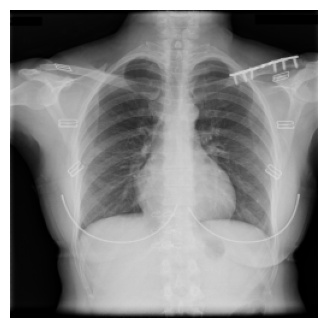

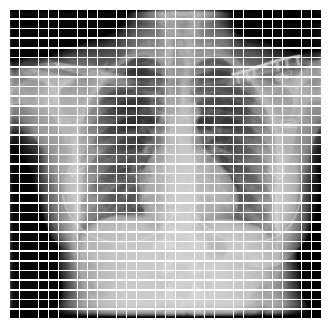

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [30]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [31]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes, activation="sigmoid")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [32]:
from matplotlib import pyplot
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

In [33]:
# compile the model
model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")],
)
model.summary()
# train the model
history = model.fit(
    x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test)
)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)} %")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 256, 256, 3)  7          ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 192)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 1024, 64)     77888       ['patches_1[0][0]']          

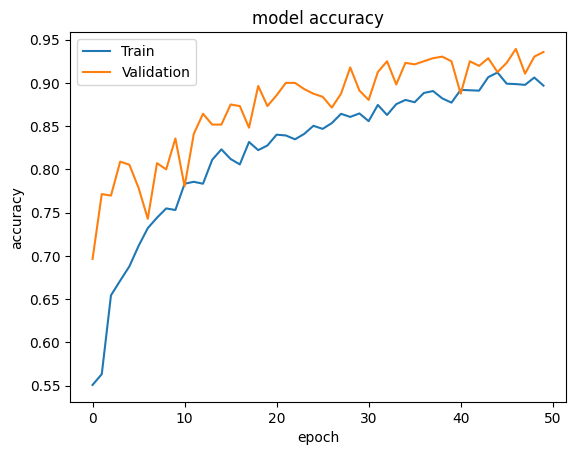

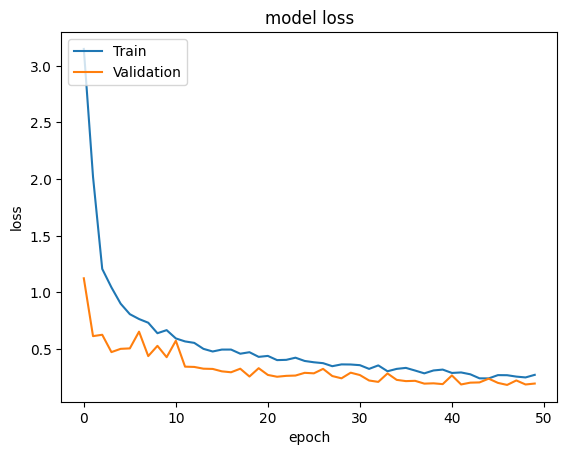

In [34]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'],label="train_acc")
plt.plot(history.history['val_accuracy'],label="val_acc")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/drive/MyDrive/tbx11k-simplified/accuracyplot.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label="train_loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("/content/drive/MyDrive/tbx11k-simplified/lossplot.png")
plt.show()

In [35]:
y_pred=model.predict(x_test)

18/18 [==============================] - 6s 279ms/step


In [36]:
y_pred=np.argmax(y_pred,axis=1)

In [37]:
y_pred

array([2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2,
       2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1,
       2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1,

In [38]:
len(y_test),len(y_pred)

(560, 560)

In [39]:
y_test=np.argmax(y_test, axis=1)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[150,   8,   7],
       [  1, 196,   2],
       [ 15,   3, 178]])

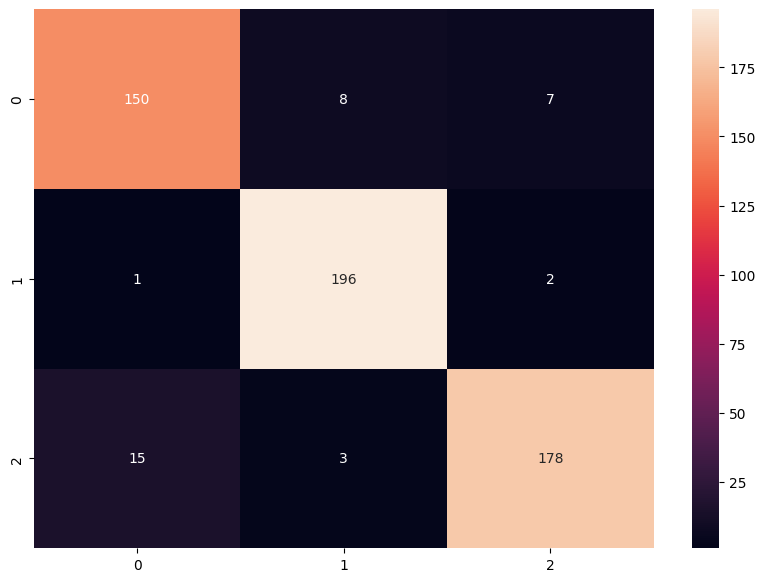

In [41]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.savefig("/content/drive/MyDrive/tbx11k-simplified/CM.png")

In [42]:
classes = ['TB','HEALTHY','SICK']  
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=classes))


              precision    recall  f1-score   support

          TB       0.90      0.91      0.91       165
     HEALTHY       0.95      0.98      0.97       199
        SICK       0.95      0.91      0.93       196

    accuracy                           0.94       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.94      0.94      0.94       560



In [46]:
# history
print(f'The model has a best accuracy of {round(max(history.history["accuracy"])*100,2)}% and a best loss of {round(min(history.history["loss"]),2)}')
 


The model has a best accuracy of 91.2% and a best loss of 0.24
